In [2]:
import sys
sys.path.append('../_amigocloud')

In [3]:
import simplekml

In [4]:
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
#from shapely.geometry import Point, MultiPoint
import os
#from fastkml import kml

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22380\2656201074.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]

In [6]:
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

# ACTUALIZAR SHP PLANIFICACION

In [7]:
ors = 27

In [8]:
# leer los dos shps de siembra y puntos de planificacion
path_siembras = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\SIEMBRAS.shp'
path_cat = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\catastro140624.shp'
path_puntos = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PUNTOS_PLAN.shp'

gdf_siembras = gpd.read_file(path_siembras)
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [9]:
# verifica si ambos shps tienen el mismo CRS
if gdf_siembras.crs == gdf_puntos.crs:
    print('Ambas capas tienen el mismo CRS')
else:
    print('No tienen el mismo CRS')

Ambas capas tienen el mismo CRS


In [10]:
# filtrar la semna de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,dia,obs,geometry
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,"MULTIPOINT (502228.292 8095676.505, 502569.859..."
2,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,MULTIPOINT (501567.491 8094671.247)
3,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,"MULTIPOINT (487108.970 8094231.674, 487653.351..."


In [11]:
multipoint_gdf = gdf_puntos_sem

In [12]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [13]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,dia,obs,geometry
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502228.292 8095676.505)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502569.859 8095446.604)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (503690.462 8094515.703)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (500941.110 8095318.648)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (501857.561 8095474.192)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502689.933 8094053.274)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502580.632 8095024.375)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (501361.500 8094847.811)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (504333.659 8094721.694)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502639.486 8094486.276)


<Axes: >

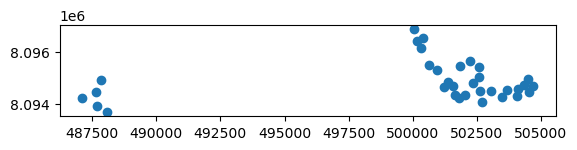

In [14]:
puntos_indi.plot()

In [15]:
# Asegurarse de que ambos GeoDataFrames tienen el mismo sistema de coordenadas (CRS)
if puntos_indi.crs != gdf_siembras.crs:
    print('Los CRS no son iguales')
    #gdf_siembras = gdf_siembras.to_crs(puntos_indi.crs)
else:
    print('Los CRS si son iguales')

Los CRS si son iguales


In [16]:
# Crear un GeoDataFrame vacío para almacenar los puntos que no intersectan con ningún polígono
puntos_indi_solicitado = puntos_indi[~puntos_indi.geometry.apply(lambda point: any(gdf_siembras.contains(point)))]

In [17]:
puntos_indi_solicitado

,unidad_03,unidad_04,os,dia,obs,geometry
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502228.292 8095676.505)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502569.859 8095446.604)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (503690.462 8094515.703)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (500941.110 8095318.648)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (501857.561 8095474.192)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502689.933 8094053.274)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502580.632 8095024.375)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (501361.500 8094847.811)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (504333.659 8094721.694)
1,41594,AGROPECUARIA CAMPO DULCE S.R.L.,27,0,None,POINT (502639.486 8094486.276)


In [18]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi_solicitado, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [19]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [20]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
2819,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L20,7.10,0,50,"POLYGON ((501107.461 8094860.692, 501108.119 8..."
2820,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L7,15.37,1,50,"POLYGON ((501510.045 8095556.280, 501495.788 8..."
2821,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.45,2,50,"POLYGON ((502662.752 8095215.781, 502656.293 8..."
2822,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L9,23.35,2,50,"POLYGON ((501646.256 8095837.263, 501800.220 8..."
2823,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.59,1,50,"POLYGON ((502549.761 8095663.451, 503187.898 8..."
2824,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L22,11.11,0,50,"POLYGON ((500309.650 8096993.736, 500239.979 8..."
2825,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.24,3,50,"POLYGON ((503740.137 8094257.659, 503785.465 8..."
2827,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L20,21.44,4,50,"POLYGON ((500618.923 8096072.015, 500575.396 8..."
2828,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L25,10.60,4,50,"POLYGON ((499988.577 8096637.082, 499827.580 8..."
2829,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.05,4,50,"POLYGON ((504137.327 8094415.183, 504648.080 8..."


In [21]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi_solicitado.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [22]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
2819,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L20,7.10,0,50,"POLYGON ((501107.461 8094860.692, 501108.119 8..."
2820,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L7,15.37,1,50,"POLYGON ((501510.045 8095556.280, 501495.788 8..."
2821,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.45,2,50,"POLYGON ((502662.752 8095215.781, 502656.293 8..."
2822,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L9,23.35,2,50,"POLYGON ((501646.256 8095837.263, 501800.220 8..."
2823,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.59,1,50,"POLYGON ((502549.761 8095663.451, 503187.898 8..."
2824,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L22,11.11,0,50,"POLYGON ((500309.650 8096993.736, 500239.979 8..."
2825,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.24,3,50,"POLYGON ((503740.137 8094257.659, 503785.465 8..."
2827,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L20,21.44,4,50,"POLYGON ((500618.923 8096072.015, 500575.396 8..."
2828,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L25,10.60,4,50,"POLYGON ((499988.577 8096637.082, 499827.580 8..."
2829,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.05,4,50,"POLYGON ((504137.327 8094415.183, 504648.080 8..."


In [23]:
poligonos_intersect_cat['fecha_ini'] = ''
poligonos_intersect_cat['origen'] = 'SOLICITUD'
poligonos_intersect_cat['dias'] = 0
poligonos_intersect_cat['fecha'] = ''
poligonos_intersect_cat['os'] = ors

In [24]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os
2819,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L20,7.10,0,50,"POLYGON ((501107.461 8094860.692, 501108.119 8...",,SOLICITUD,0,,27
2820,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L7,15.37,1,50,"POLYGON ((501510.045 8095556.280, 501495.788 8...",,SOLICITUD,0,,27
2821,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.45,2,50,"POLYGON ((502662.752 8095215.781, 502656.293 8...",,SOLICITUD,0,,27
2822,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L9,23.35,2,50,"POLYGON ((501646.256 8095837.263, 501800.220 8...",,SOLICITUD,0,,27
2823,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.59,1,50,"POLYGON ((502549.761 8095663.451, 503187.898 8...",,SOLICITUD,0,,27
2824,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L22,11.11,0,50,"POLYGON ((500309.650 8096993.736, 500239.979 8...",,SOLICITUD,0,,27
2825,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.24,3,50,"POLYGON ((503740.137 8094257.659, 503785.465 8...",,SOLICITUD,0,,27
2827,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L20,21.44,4,50,"POLYGON ((500618.923 8096072.015, 500575.396 8...",,SOLICITUD,0,,27
2828,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L25,10.60,4,50,"POLYGON ((499988.577 8096637.082, 499827.580 8...",,SOLICITUD,0,,27
2829,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.05,4,50,"POLYGON ((504137.327 8094415.183, 504648.080 8...",,SOLICITUD,0,,27


In [25]:
# SELECCIONAR LOS LOTES DE SIEMBRAS
# identifoca los lotes que se intersectan
gdf_lotes_siem = gpd.sjoin(gdf_siembras, multipoint_gdf, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_siem = gdf_siembras.loc[gdf_siembras.index.isin(gdf_lotes_siem.index)]
# copy
poligonos_intersect_siem = poligonos_intersect_siem.copy()
# agregar campo de semana_planificacion
poligonos_intersect_siem['os'] = ors

In [26]:
poligonos_intersect_siem['soca'] = poligonos_intersect_siem['origen'].apply(lambda x: 1 if 'SIEMBRA 2023' in x else 0)

In [27]:
poligonos_intersect_siem = poligonos_intersect_siem[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area',
       'fecha_ini', 'origen', 'dias', 'fecha', 'prioridad', 'inst', 'geometry', 'os', 'soca']]

In [28]:
poligonos_intersect_siem

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,inst,geometry,os,soca


In [29]:
# Concatenar los DataFrames a lo largo de las filas (axis=0)
plan = pd.concat([poligonos_intersect_cat, poligonos_intersect_siem], axis=0)
# Si deseas restablecer el índice después de concatenar
plan.reset_index(drop=True, inplace=True)

<Axes: >

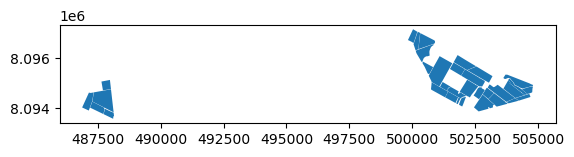

In [30]:
plan.plot()

In [31]:
plan['area'].sum()

586.31

In [32]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [34]:
plan['area'].sum()

586.3213410895852

In [36]:
# cargar el shp de planificacion existente
path_plan = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION_TEST.shp'
gdf_plan = gpd.read_file(path_plan)

In [37]:
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [38]:
last_id

37

In [39]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [40]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L20,7.095109,0,50,"POLYGON ((501107.461 8094860.692, 501108.119 8...",,SOLICITUD,0.0,,27,NaN,38
1,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L7,15.371285,1,50,"POLYGON ((501510.045 8095556.280, 501495.788 8...",,SOLICITUD,0.0,,27,NaN,39
2,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.445201,2,50,"POLYGON ((502662.752 8095215.781, 502656.293 8...",,SOLICITUD,0.0,,27,NaN,40
3,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L9,23.347786,2,50,"POLYGON ((501646.256 8095837.263, 501800.220 8...",,SOLICITUD,0.0,,27,NaN,41
4,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.586339,1,50,"POLYGON ((502549.761 8095663.451, 503187.898 8...",,SOLICITUD,0.0,,27,NaN,42
5,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L22,11.114179,0,50,"POLYGON ((500309.650 8096993.736, 500239.979 8...",,SOLICITUD,0.0,,27,NaN,43
6,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.243207,3,50,"POLYGON ((503740.137 8094257.659, 503785.465 8...",,SOLICITUD,0.0,,27,NaN,44
7,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L20,21.435347,4,50,"POLYGON ((500618.923 8096072.015, 500575.396 8...",,SOLICITUD,0.0,,27,NaN,45
8,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L25,10.604442,4,50,"POLYGON ((499988.577 8096637.082, 499827.580 8...",,SOLICITUD,0.0,,27,NaN,46
9,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.048921,4,50,"POLYGON ((504137.327 8094415.183, 504648.080 8...",,SOLICITUD,0.0,,27,NaN,47


In [41]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

In [42]:
gdf_pla_gral['area'].sum()

760.044757297695

In [43]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [44]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

In [45]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,os,soca,id,inst,geometry
0,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,37,2024-05-21,1.0,26,1,1,69,"POLYGON ((488616.298 8103763.516, 488519.488 8..."
1,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.2,1.835936,2024-04-15,SIEMBRA 2024,73,2024-04-15,6.0,26,0,2,62,"POLYGON ((473330.370 8101634.734, 473440.011 8..."
2,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L6,1.960231,2024-04-15,SIEMBRA 2024,73,2024-04-15,6.0,26,0,3,62,"POLYGON ((473242.172 8101427.289, 473148.580 8..."
3,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L9.1,3.607907,2024-04-16,SIEMBRA 2024,72,2024-04-16,6.0,26,0,4,62,"POLYGON ((473286.579 8101086.503, 473265.875 8..."
4,2123,LAS CHACRAS PORTACHUELO,13132,ZUMARAN MENACHO JORGE,L1.6,0.386826,2024-04-22,SIEMBRA 2024,66,2024-04-22,10.0,26,0,5,50,"POLYGON ((455236.898 8084312.120, 455248.807 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L2,8.892186,,SOLICITUD,0,,NaN,27,0,66,79,"POLYGON ((487789.363 8093979.038, 487947.338 8..."
66,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L3,14.046489,,SOLICITUD,0,,NaN,27,0,67,79,"POLYGON ((487193.395 8094028.850, 487262.759 8..."
67,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L4,17.272132,,SOLICITUD,0,,NaN,27,0,68,79,"POLYGON ((487147.633 8094625.243, 487218.409 8..."
68,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L1,48.404143,,SOLICITUD,0,,NaN,27,0,69,79,"POLYGON ((487345.806 8094635.527, 488024.724 8..."


# CARGAR PLANIFICACION A AMIGOCLOUD

In [46]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [47]:
# repreyectar a WGS84
gdf_pla_gral = gdf_pla_gral.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [48]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,os,soca,id,inst,geometry
0,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,37,2024-05-21,1.0,26,1,1,69,"MULTIPOLYGON (((-63.10703 -17.15076, -63.10794..."
1,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.2,1.835936,2024-04-15,SIEMBRA 2024,73,2024-04-15,6.0,26,0,2,62,"MULTIPOLYGON (((-63.25078 -17.16988, -63.24975..."
2,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L6,1.960231,2024-04-15,SIEMBRA 2024,73,2024-04-15,6.0,26,0,3,62,"MULTIPOLYGON (((-63.25161 -17.17175, -63.25249..."
3,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L9.1,3.607907,2024-04-16,SIEMBRA 2024,72,2024-04-16,6.0,26,0,4,62,"MULTIPOLYGON (((-63.25120 -17.17483, -63.25139..."
4,2123,LAS CHACRAS PORTACHUELO,13132,ZUMARAN MENACHO JORGE,L1.6,0.386826,2024-04-22,SIEMBRA 2024,66,2024-04-22,10.0,26,0,5,50,"MULTIPOLYGON (((-63.42127 -17.32618, -63.42116..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L2,8.892186,,SOLICITUD,0,,NaN,27,0,66,79,"MULTIPOLYGON (((-63.11486 -17.23920, -63.11338..."
66,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L3,14.046489,,SOLICITUD,0,,NaN,27,0,67,79,"MULTIPOLYGON (((-63.12047 -17.23875, -63.11981..."
67,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L4,17.272132,,SOLICITUD,0,,NaN,27,0,68,79,"MULTIPOLYGON (((-63.12089 -17.23336, -63.12023..."
68,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L1,48.404143,,SOLICITUD,0,,NaN,27,0,69,79,"MULTIPOLYGON (((-63.11903 -17.23327, -63.11264..."


In [49]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/33457/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_345601 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, origen, dias, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['origen']}', '{row['dias']}', '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CREAR KMLS DE PLANIFICACION

In [56]:
path_kml = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN'

In [57]:
path_plan = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION_TEST.shp'
gdf_plan = gpd.read_file(path_plan)

In [58]:
gdf_plan_sem = gdf_plan[gdf_plan['os'] == ors]
gdf_plan_sem['area'].sum()

586.3213410895852

In [59]:
lista_cods = list(set(gdf_plan_sem['unidad_01']))

In [60]:
lista_cods

[577, 30]

In [61]:
for i in lista_cods:
    prop = gdf_plan_sem[gdf_plan_sem['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\577
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\30


# CARGAR XLSX

In [62]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [64]:
# Cargar el archivo Excel
file_path = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\PARTE DIARIO TRICHOGRAMMA 2024_RES.xlsx'
sheet_name = 'DATA'
table_name = 'tbl_data'

In [65]:
excel_data = pd.read_excel(file_path)

In [66]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,os,soca,id,inst,geometry
0,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,37,2024-05-21,1.0,26,1,1,69,"MULTIPOLYGON (((-63.10703 -17.15076, -63.10794..."
1,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.2,1.835936,2024-04-15,SIEMBRA 2024,73,2024-04-15,6.0,26,0,2,62,"MULTIPOLYGON (((-63.25078 -17.16988, -63.24975..."
2,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L6,1.960231,2024-04-15,SIEMBRA 2024,73,2024-04-15,6.0,26,0,3,62,"MULTIPOLYGON (((-63.25161 -17.17175, -63.25249..."
3,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L9.1,3.607907,2024-04-16,SIEMBRA 2024,72,2024-04-16,6.0,26,0,4,62,"MULTIPOLYGON (((-63.25120 -17.17483, -63.25139..."
4,2123,LAS CHACRAS PORTACHUELO,13132,ZUMARAN MENACHO JORGE,L1.6,0.386826,2024-04-22,SIEMBRA 2024,66,2024-04-22,10.0,26,0,5,50,"MULTIPOLYGON (((-63.42127 -17.32618, -63.42116..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L2,8.892186,,SOLICITUD,0,,NaN,27,0,66,79,"MULTIPOLYGON (((-63.11486 -17.23920, -63.11338..."
66,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L3,14.046489,,SOLICITUD,0,,NaN,27,0,67,79,"MULTIPOLYGON (((-63.12047 -17.23875, -63.11981..."
67,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L4,17.272132,,SOLICITUD,0,,NaN,27,0,68,79,"MULTIPOLYGON (((-63.12089 -17.23336, -63.12023..."
68,577,SAN ANTONIO--IAG,41594,AGROPECUARIA CAMPO DULCE S.R.L.,L1,48.404143,,SOLICITUD,0,,NaN,27,0,69,79,"MULTIPOLYGON (((-63.11903 -17.23327, -63.11264..."


In [67]:
list(gdf_pla_gral['unidad_01'])

[47,
 187,
 187,
 187,
 2123,
 2123,
 1714,
 2123,
 990,
 1714,
 990,
 1204,
 2123,
 2123,
 2123,
 2123,
 370,
 1204,
 2123,
 2123,
 2123,
 2123,
 2123,
 2123,
 1587,
 510,
 98,
 483,
 483,
 47,
 47,
 47,
 483,
 1211,
 47,
 47,
 98,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 577,
 577,
 577,
 577,
 577]

In [68]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'FINANCIADO': list(gdf_pla_gral['origen']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [69]:
new_df['PRODUCTO'] = 'TRICHOGRAMMA'
new_df['DOSIS'] = '6ml'

In [70]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,FINANCIADO,ID,OS,PRODUCTO,DOSIS
0,69,40149,PAZ REA JOSE ERNESTO,47,SANTA MARTHA,A7,10.696703,1,SIEMBRA 2023,1,26,TRICHOGRAMMA,6ml
1,62,5421,HUBBAUER HOYOS ENRIQUE,187,MATIAS--HABBAUER,L7.2,1.835936,0,SIEMBRA 2024,2,26,TRICHOGRAMMA,6ml
2,62,5421,HUBBAUER HOYOS ENRIQUE,187,MATIAS--HABBAUER,L6,1.960231,0,SIEMBRA 2024,3,26,TRICHOGRAMMA,6ml
3,62,5421,HUBBAUER HOYOS ENRIQUE,187,MATIAS--HABBAUER,L9.1,3.607907,0,SIEMBRA 2024,4,26,TRICHOGRAMMA,6ml
4,50,13132,ZUMARAN MENACHO JORGE,2123,LAS CHACRAS PORTACHUELO,L1.6,0.386826,0,SIEMBRA 2024,5,26,TRICHOGRAMMA,6ml
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,577,SAN ANTONIO--IAG,L2,8.892186,0,SOLICITUD,66,27,TRICHOGRAMMA,6ml
66,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,577,SAN ANTONIO--IAG,L3,14.046489,0,SOLICITUD,67,27,TRICHOGRAMMA,6ml
67,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,577,SAN ANTONIO--IAG,L4,17.272132,0,SOLICITUD,68,27,TRICHOGRAMMA,6ml
68,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,577,SAN ANTONIO--IAG,L1,48.404143,0,SOLICITUD,69,27,TRICHOGRAMMA,6ml


In [71]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [72]:
output_file_path = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\PARTE DIARIO TRICHOGRAMMA 2024_RES.xlsx'
final_data.to_excel(output_file_path, index=False)